# Group Final Project


## Group 6: Forever 4.0


In [201]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt

### 1. Read Data and check the DataFrame

### Source= “https://www.kaggle.com/datasets/michaelbryantds/billiondollar-disasters?resource=download”
#### Main Variables:

Name / Disaster	/ Begin Date / End Date	/ Total CPI-Adjusted Cost (Millions of Dollars)	/ Deaths


In [202]:
df = pd.read_csv("events-US-1980-2022.csv")

In [203]:
#print shape of the dataframe

shape = df.shape
print("\nThe Shape of the DataFrame is:", shape)
print("\nThe number of row is:", shape[0])
print('\nThe number of column is:', shape[1])


The Shape of the DataFrame is: (338, 6)

The number of row is: 338

The number of column is: 6


In [204]:
#print header
df.head(10)

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2551.4,7
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2071,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,37675.2,1260
3,Florida Freeze (January 1981),Freeze,19810112,19810114,1921.9,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1304.7,20
5,"Midwest/Southeast/Northeast Winter Storm, Cold...",Winter Storm,19820108,19820116,2052.4,85
6,Midwest/Plains/Southeast Tornadoes (April 1982),Severe Storm,19820402,19820404,1488.4,33
7,Severe Storms (June 1982),Severe Storm,19820531,19820610,1464.1,30
8,Gulf States Storms and Flooding (December 1982...,Flooding,19821201,19830115,4577.5,45
9,Western Storms and Flooding (December 1982-Mar...,Flooding,19821213,19830331,4468.9,50


In [205]:
#print information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Name                                           338 non-null    object
 1   Disaster                                       338 non-null    object
 2   Begin Date                                     338 non-null    int64 
 3   End Date                                       338 non-null    int64 
 4   Total CPI-Adjusted Cost (Millions of Dollars)  338 non-null    object
 5   Deaths                                         338 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.0+ KB


### No null values
### 3 object value
### 3 integer value

## 2. Explore Variables

In [206]:
#describe disaster
result = df['Disaster'].describe()
pd.DataFrame(result)

,Disaster
count,338
unique,7
top,Severe Storm
freq,162


### There are total 338 disasters and 7 unique kinds of disaster 
### The top disaster is Severe Storm, the frequency is 162





In [207]:
#caculate amount spent
df['Amount'] = pd.to_numeric(df['Total CPI-Adjusted Cost (Millions of Dollars)'], errors = 'coerce').fillna(0)
df['Amount'] = df['Amount'].astype(int)

In [208]:
#Describe Amount
df['Amount'].describe()

count       338.000000
mean       6796.745562
std       16864.972421
min           0.000000
25%        1518.750000
50%        2293.000000
75%        4818.000000
max      186294.000000
Name: Amount, dtype: float64

In [209]:
#create begin year
df['Start Time'] = pd.to_datetime(df['Begin Date'], format='%Y%m%d')
df['Begin Year'] = df['Start Time'].dt.year


In [210]:
#calculate disaster count by year
df_countbyyear = df.groupby('Begin Year')[['Disaster']].count()
df_countbyyearSorted = df_countbyyear.sort_values('Disaster', ascending=False)
df_countbyyearSorted

,Disaster
Begin Year,
2020,22
2021,20
2017,18
2011,18
2022,15
2018,15
2016,15
2019,14
2008,12


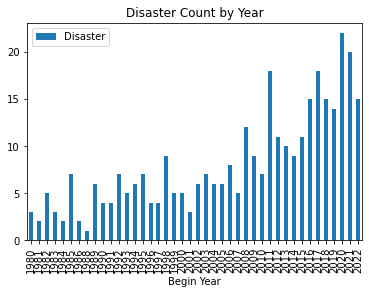

In [211]:
#Bar chart for disaster count by year
df_countbyyear.plot.bar()
plt.title('Disaster Count by Year')
plt.show()

In [212]:
#calculate cost amount by year
df_countbyyear = df.groupby('Begin Year')[['Disaster']].count()
AmoutByYearSorted=df_amoutbyyear.sort_values('Amount', ascending=False)
AmoutByYearSorted

,Amount
Begin Year,
2017,366667
2005,248723
2021,152497
2012,147113
2020,111642
2018,106665
2011,90815
2008,87196
2004,85486


In [213]:
#bar chart for Count by year with disaster categories
df_countbyyear = df.groupby(['Begin Year', 'Disaster']).size()
df_countbyyear=pd.DataFrame(df_countbyyear)
df_countbyyear = df_countbyyear.reset_index()
df_countbyyear.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Begin Year  163 non-null    int64 
 1   Disaster    163 non-null    object
 2   0           163 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ KB


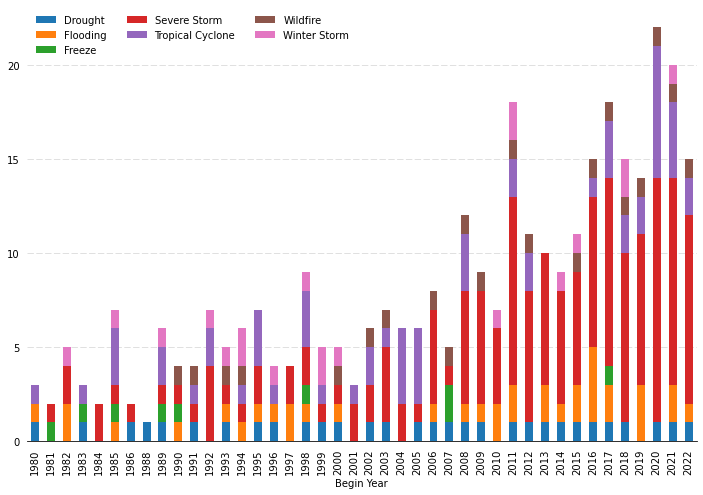

In [214]:
fig, ax = plt.subplots(figsize = (12, 8))
df_countbyyear.pivot(index = 'Begin Year', columns = 'Disaster', values = 0).plot.bar(stacked = True, ax = ax, zorder = 3)
ax.legend(ncol = 3, edgecolor = 'w')
[ax.spines[s].set_visible(False) for s in ['top', 'right', 'left']]
ax.tick_params(axis = 'both', left = False, bottom = False)
ax.grid (axis = 'y', dashes = (8, 3), color = 'gray', alpha = 0.3)

In [215]:
#calculate cost amount by year
df_amoutbyyear = df.groupby('Begin Year')[['Amount']].sum()
AmoutByYearSorted=df_amoutbyyear.sort_values('Amount', ascending=False)
AmoutByYearSorted

,Amount
Begin Year,
2017,366667
2005,248723
2021,152497
2012,147113
2020,111642
2018,106665
2011,90815
2008,87196
2004,85486


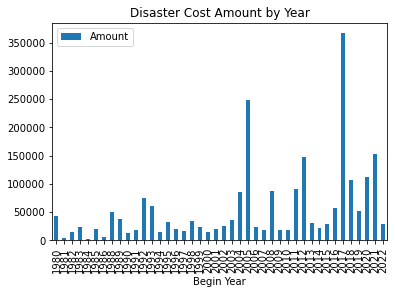

In [216]:
#bar chart for Amount by year
df_amoutbyyear.plot.bar()
plt.title('Disaster Cost Amount by Year')
plt.show()

In [217]:
#caculate duration
df['Start Time'] = pd.to_datetime(df['Begin Date'], format='%Y%m%d')

In [218]:
df['End Time'] = pd.to_datetime(df['End Date'], format='%Y%m%d')

In [219]:
df['Duration'] = (df['End Time'] - df['Start Time'])
df['Duration'] = df['Duration'].dt.days

In [220]:
df_duration = df.groupby('Disaster').mean()[['Duration']]
df_duration

,Duration
Disaster,
Drought,224.866667
Flooding,25.513514
Freeze,5.000000
Severe Storm,2.845679
Tropical Cyclone,3.406780
Wildfire,161.714286
Winter Storm,5.000000


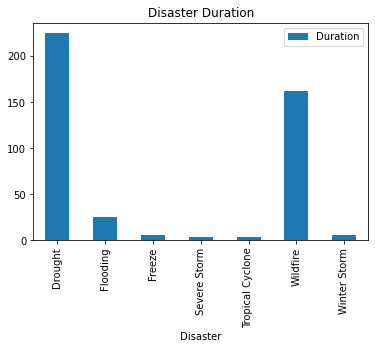

In [221]:
#bar chart for Duration by Disaster
df_duration.plot.bar()
plt.title('Disaster Duration')
plt.show()

In [222]:
#caculate start month
df['Start Month'] = df['Start Time'].dt.month

#DEFINE SEASON
seasons = {1: 'Winter', 2:'Winter', 3: 'Spring', 4:'Spring', 5:'Spring', 6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall',11:'Fall',12:'Winter'}
df['Season'] = df['Start Month'].apply(lambda x: seasons[x])      
df.head()
df['Season'].describe()

count        338
unique         4
top       Spring
freq         130
Name: Season, dtype: object

In [223]:
df_countbyseason = df.groupby('Season')[['Disaster']].count()
df_countbyseason

,Disaster
Season,
Fall,52
Spring,130
Summer,99
Winter,57


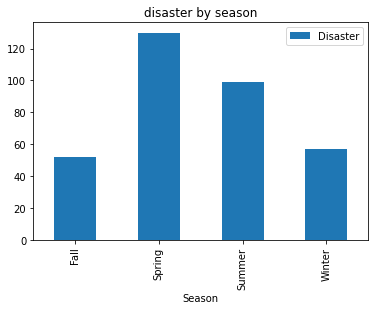

In [224]:
#bar chart for disaster by season
df_countbyseason.plot.bar()
plt.title('disaster by season')
plt.show()

In [225]:
#bar chart for Count by season with disaster categories
df_countbyseason = df.groupby(['Season', 'Disaster']).size()
df_countbyseason = pd.DataFrame(df_countbyseason)
df_countbyseason = df_countbyseason.reset_index()
df_countbyseason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    22 non-null     object
 1   Disaster  22 non-null     object
 2   0         22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Text(0, 0.5, 'Disaster Count')

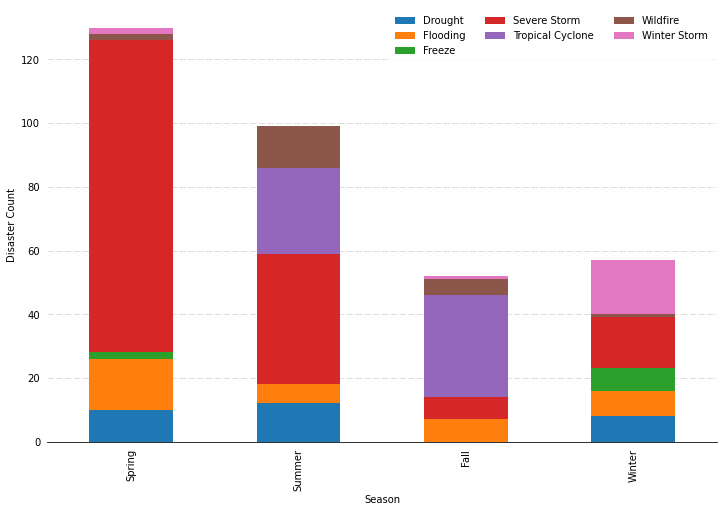

In [226]:
df_s_c = df_countbyseason
from pandas.api.types import CategoricalDtype
season_order = CategoricalDtype(
    ['Spring','Summer','Fall','Winter'],
    ordered=True)
df_s_c['Season'] = df_s_c['Season'].astype(season_order)
season_pivot = df_countbyseason.pivot(index = 'Season', columns = 'Disaster', values = 0)
fig, ax = plt.subplots(figsize = (12, 8))
season_pivot.plot.bar(stacked = True, ax = ax, zorder = 3)
ax.legend(ncol = 3, edgecolor = 'w')
[ax.spines[s].set_visible(False) for s in ['top', 'right', 'left']]
ax.tick_params(axis = 'both', left = False, bottom = False)
ax.grid (axis = 'y', dashes = (8, 3), color = 'gray', alpha = 0.3)
plt.ylabel('Disaster Count')

In [227]:
#pivot table of season and disaster on cost 
rpt=df.pivot_table('Amount',index='Disaster',columns='Season',aggfunc='mean')
rpt

Season,Fall,Spring,Summer,Winter
Disaster,,,,
Drought,NaN,8472.300000,11512.083333,10840.000000
Flooding,2065.000000,4235.625000,10185.833333,3888.125000
Freeze,NaN,2071.500000,NaN,4341.285714
Severe Storm,1988.714286,2560.020408,1956.121951,1809.125000
Tropical Cyclone,18356.312500,NaN,22479.592593,NaN
Wildfire,3942.600000,919.000000,7956.000000,2156.000000
Winter Storm,1193.000000,6921.000000,NaN,4015.529412


Text(0, 0.5, 'Average Cost of Disaster')

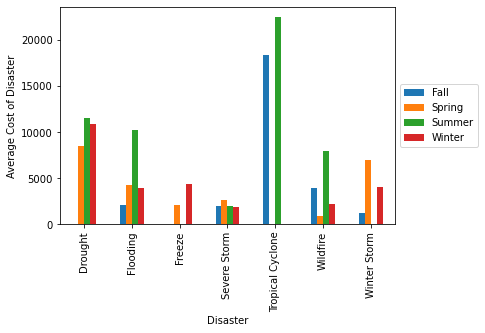

In [229]:
#bar chart on pivot table
import matplotlib.pyplot as plt
rpt.plot(kind='bar').legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Average Cost of Disaster')

In [230]:
#describe death
df['Deaths'].describe()

count     338.000000
mean       46.417160
std       211.957628
min         0.000000
25%         1.000000
50%         6.000000
75%        27.750000
max      2981.000000
Name: Deaths, dtype: float64

In [231]:
#group death by disaster, total
df_dis = df.groupby('Disaster').sum()[['Deaths']]
df_dis

,Deaths
Disaster,
Drought,4256
Flooding,676
Freeze,162
Severe Storm,1982
Tropical Cyclone,6864
Wildfire,435
Winter Storm,1314


In [232]:
#group death by disaster, mean
df_dis = df.groupby('Disaster').mean()[['Deaths']]
df_dis

,Deaths
Disaster,
Drought,141.866667
Flooding,18.270270
Freeze,18.000000
Severe Storm,12.234568
Tropical Cyclone,116.338983
Wildfire,20.714286
Winter Storm,65.700000


In [233]:
#group death by year, total
df_dis = df.groupby('Begin Year')[['Deaths']].sum()
df_dis

,Deaths
Begin Year,
1980,1280
1981,20
1982,243
1983,172
1984,81
1985,379
1986,113
1988,454
1989,228


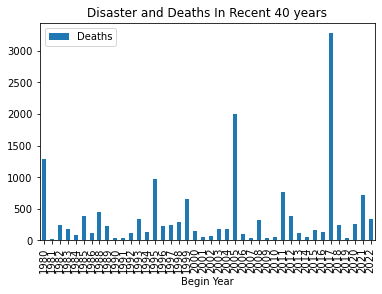

In [234]:
#bar chart for death by year
df_dis.plot.bar()
plt.title('Disaster and Deaths In Recent 40 years')
plt.show()

In [235]:
#Regression analysis
import statsmodels.api as sm

X=df[['Deaths','Duration']]
X=sm.add_constant(X)

Y=df['Amount']

model=sm.OLS(Y,X).fit()
pridictions=model.predict()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     102.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.44e-35
Time:                        14:54:10   Log-Likelihood:                -3687.9
No. Observations:                 338   AIC:                             7382.
Df Residuals:                     335   BIC:                             7393.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4350.0326    804.968      5.404      0.0

In [236]:
#Regression analysis
import statsmodels.api as sm

X=df[['Deaths']]
X=sm.add_constant(X)

Y=df['Amount']

model=sm.OLS(Y,X).fit()
pridictions=model.predict()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           9.23e-37
Time:                        14:54:10   Log-Likelihood:                -3688.1
No. Observations:                 338   AIC:                             7380.
Df Residuals:                     336   BIC:                             7388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4519.9660    740.562      6.103      0.0

In [237]:
#extract regression equation information and print
print(model.params)



const     4519.966016
Deaths      49.050385
dtype: float64


In [238]:
rep=model.params.round(2)
print(f'Regrssion equation is: Yhat = {rep[0]}+{rep[1]}*Death')

Regrssion equation is: Yhat = 4519.97+49.05*Death


[Text(0.5, 1.0, 'Cost Amount vs. Death Scatterplot and Trendline')]

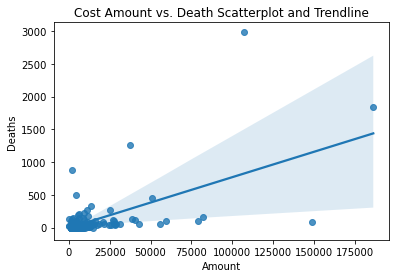

In [239]:
#correlation and trend line
sns.regplot(x="Amount",y="Deaths",data=df).set(title="Cost Amount vs. Death Scatterplot and Trendline")